## Computational Guided Inquiry for Polar Research  

## Seasonal Arctic ice  melt - 1. Introduction to polar data

### Activity overview  
1. Explore datasets available for Arctic sea ice volume and extent
2. Develop skills in acquiring and plotting information in these datasets using python

### Pre-class activities

1. Read the Introduction
2. Write definitions of the terms _albedo_, _ice-albedo feedback_, _sea ice volume_, and _sea ice extent_.


## Introduction

_Climate connection_  
Human activity has changed the composition of the atmosphere in such a way that the temperature of the planet has increased. Polar regions have undergone greater increases in temperature than midlatitudes, a phenomenon called _polar amplification_. Recent research has also shown that this amplified warming has a significant impact on weather at lower latitudes, causing severe episodes of drought and heavy rainfall in North America and Asia.

Polar ampification is largely due to a phenomenon called _ice-albedo feedback_. Ice-albedo feedback works as follows: Ice and snow have a high _albedo_, meaning those surfaces efficiently reflect radiation away from the earth's surface. But the water that comes from _melted_ snow and ice has a lower albedo, meaning it absorbs more solar radiation. That, in turn,  warms the surface a little more, which causes more melting, and so on: a postive feedback. 

All this means that sea ice extent in polar regions is a key climate driver. To that end, climate scientists have taken careful measurements of the seasonal melting and freezing of ice in polar regions, as well as trends in that melting and freezing from year to year. Here, you will examine some of this data. 

Sea ice _extent_ refers to the area covered by sea ice. Sea ice extent varies a lot over a season, as shown in the figure below. 

<p style='text-align: center;'>
<img src="https://ads.nipr.ac.jp/vishop/graph/Sea_Ice_Extent_N_prev_v2.png" height="400" width="400"/>  
Figure 2. Arctic sea ice extent
</p>

One question for climate scientists concerns _how_ Arctic ice melts seasonally. An insight into this question regards the ice _thickness_: is it getting thicker, or thinner, over the "melt season", i.e., the time interval from maximum to minimum ice extent? Any ideas on this?

One way to get at Arctic ice thickness is by taking measurements of Arctic ice _volume_ in addition to Arctic ice _extent_. Then you could estimate the thickness of the ice. This follows from simple dimensional analysis: volume has units $m^3$, while extent has units $m^2$ (in SI units). So the ratio between them is a measure of Arctic ice thickness.

In this CGI, you'll infer Arctic ice thickness from sea ice extent and volume data. In doing so, you'll develop familiarity with the seasonal and year-to-year patterns, skill at visualizing and analyzing the available data, and perhaps glean some insight into the mechanisms behind the seasonal melt of Arctic sea ice.

### Part I. Viewing and retrieving polar sea ice data

In [8]:
# Load packages that we will need
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

Here you will use the Sea Ice Animation Tool provided by the National Snow and Ice Data Center (NSIDC) to watch the seasonal cycles of polar sea ice. These images are created using a satellite microwave sensor. Go to the website https://nsidc.org/data/. The third column says, _Data For Everyone_. In that column, choose _Sea Ice Index_. You will see a map of the Arctic. Under _Arctic_ at the top, click on _Animate Monthly Images_.  You should now be in a page titled _Sea Ice Index Animation Tool_. 

1) Select January 2002 as the start year and press the > button to march through images of sea ice extent over the course of a few years. In what month is Arctic sea ice at a maximum? a minimum?  
2) Still in the _Sea Ice Index Animation Tool_, select 1995 again, but now specify the start month as the month of minimum extent that you identified in the previous step. Then click on _fixed month animations_, and run the animation again.   

### Pause for analysis: Do you detect any trends in the minmum sea ice extent over the time period 1995 to present? Which year seems to have had the least minimum sea ice extent? Are these results qualitatively consistent with the data presented in Figure 1? 

Next you'll use the NSIDC site to verify some data. Fortunately, let's suppose your partner has obtained these monthly average sea ice extent data for a particular year. They kindly entered that data in the cell below, and added an array of months, from 1 (January) to 12 (December), using the _arange_ function (which comes from numpy, by the way). 

In [9]:
# Define sea ice extent values for a particular year
months = arange(1,13)
sea_ice_extent = array([13.607,14.292,14.522,13.806,12.093,10.645,8.184,5.595,4.738,6.49,9.08,12.062])
print (months)
print (sea_ice_extent)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 13.607  14.292  14.522  13.806  12.093  10.645   8.184   5.595   4.738
   6.49    9.08   12.062]


Unfortunately, your partner did not record the units of these data. Are they in square miles? square kilometers? For that matter, they didn't record the year these data correspond to either. Bad partner.

So ... you need to do a little sleuthing. Go back to https://nsidc.org/data/seaice_index/, click on _Data Archive_ on the far right, then on the dark blue tab that says _Data_. Then go to the FTP directory under _Monthly Sea Ice Extent and Area Data Files_. Eventually you should be able to navigate to "seaice_analysis" (which might require logging in as "Guest"), and from there, to "Sea_Ice_Index_Monthly_Data_by_Year_G02135_v2.1.xlsx". A spreadsheet should open. 

### Pause for analysis: If you check out the "NH-extent" tab at the bottom of the spreadsheet, you should be able to identify the units of the sea ice extent data. In the "NH-area" tab, you should be able to identify the year the above monthly data correspond to. Record the units and the year in your notebook. 

### Part II. Plotting Arctic sea  ice data

Plot the Sea Ice Extent with the correct units.

<IPython.core.display.Javascript object>


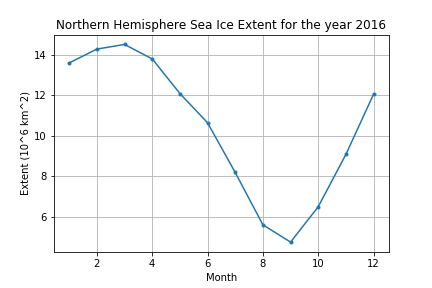

In [10]:
# Open up a plotting window with gridlines
figure()
grid('on')

# Plot the sea ice extent ... but modify the y-label so it includes the correct units
plot(months,sea_ice_extent,'.-')
title('Northern Hemisphere Sea Ice Extent for the year 2016')
xlabel('Month')
ylabel('Extent (10^6 km^2)')

Your partner also got some sea ice volume from NSIDC for the same month, this time with units. 

In [11]:
# Define sea ice volume values for a particular year. The data are in units 1000 km^3
sea_ice_volume = array([17.185,19.592,21.524,22.459,21.026,16.493,10.257,5.941,4.530,5.511,7.834,11.206])
print (sea_ice_volume)

[ 17.185  19.592  21.524  22.459  21.026  16.493  10.257   5.941   4.53
   5.511   7.834  11.206]


Plot the Sea Ice volume, with the units labeled.

<IPython.core.display.Javascript object>


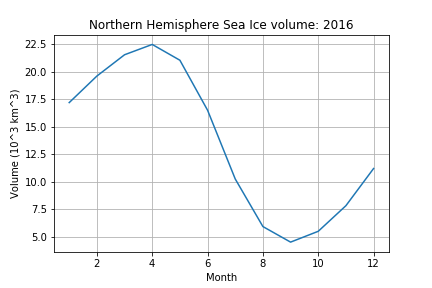

In [12]:
# Open up a plotting window with gridlines
figure()
grid('on')

# Plot the sea ice volume ... with correct units 
plot(months,sea_ice_volume)
title('Northern Hemisphere Sea Ice volume: 2016')
xlabel('Month')
ylabel('Volume (10^3 km^3)')

### Part III. Analyzing Arctic sea  ice thickness

From dimensional analysis, you can estimate the thickness of Arctic sea ice, but first it's best to convert the sea ice extent to m^2, and the volume to km^3. Do these conversions and calculate the thickness.

In [13]:
# Get the volume in km^3
sea_ice_volume_km3 = sea_ice_volume*1e3

# Get the extent in km^2
sea_ice_extent_km2 = sea_ice_extent*1e6

# Calculate the thickness in km
sea_ice_thickness_km = sea_ice_volume_km3/sea_ice_extent_km2

# Convert the thickness to m
sea_ice_thickness_m = sea_ice_thickness_km*1e3
print ('Ice thickness', sea_ice_thickness_m, 'meters')

Ice thickness [ 1.26295289  1.37083683  1.48216499  1.62675648  1.73869181  1.5493659
  1.25329912  1.06184093  0.95609962  0.84915254  0.86277533  0.92903333] meters


It will probably help to plot these thickness -- do so, with labels and units.

<IPython.core.display.Javascript object>


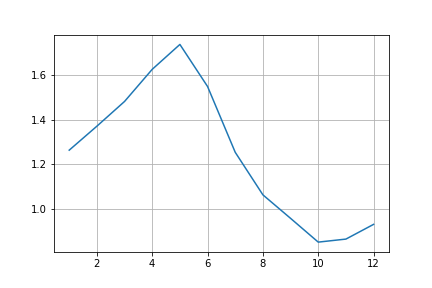

In [14]:
# Open up a plotting window with gridlines
figure()
grid('on')

# Plot the thickness as a function of month
plot(months,sea_ice_thickness_m)

### Pause for Analysis: On average, approximately how thick is Arctic ice? Over the "melt" season (months between maximum and minimum sea ice extent), is the trend what you expected to find? 

### Post-activity reflection

Record your Pause for Analysis reflections in your notebook, with appropriate graphs and equations. If you can devise an hypothesis for the thickening or thinning of Arctic ice over the melt season, provide one. If not, pose a research question whose answer might help.
